In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [58]:
dataset = pd.read_csv(r"C:\Users\Bhargav Nath\Downloads\New folder\AZ\A_Z Handwritten Data.csv").astype('float32')

In [59]:
dataset.rename(columns={'0':'label'}, inplace= True)

In [60]:
x = dataset.drop('label', axis = 1)
y = dataset['label']

In [61]:
x.shape

(372450, 784)

In [62]:
x.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
from sklearn.utils import shuffle
X_shuffle = shuffle(x)

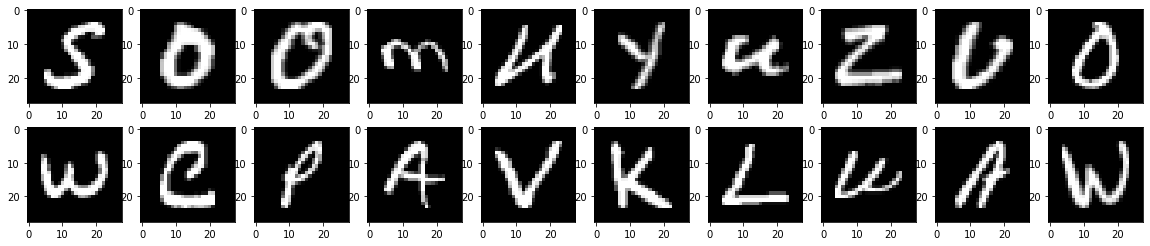

In [64]:
W_grid = 10
L_grid = 2
fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,4))
axes = axes.ravel() 
n_training = len(X_shuffle) 
for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_shuffle.iloc[index].values.reshape(28,28), interpolation='nearest', cmap = 'gray')
    axes[i].axis('on')

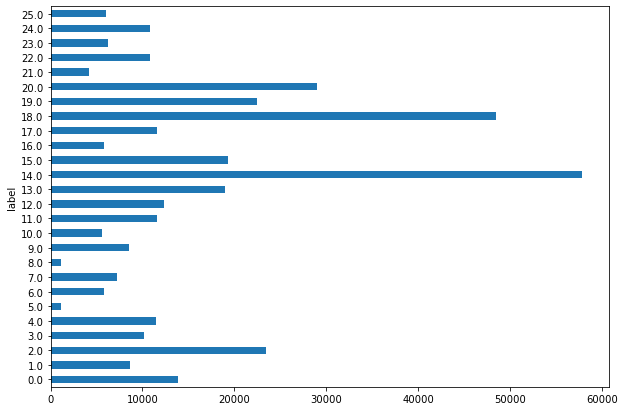

In [65]:
#dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label']
label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,7))
plt.show()

In [66]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.2)

In [67]:
standard_scaler= MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [176]:
print(X_train.shape, X_test.shape)
print(Y_train)

(297960, 28, 28, 1) (74490, 28, 28, 1)
[14  1 14 ... 14  7 22]


In [177]:
X_train = np.array(X_train).reshape(-1,28,28,1)
X_test = np.array(X_test).reshape(-1,28,28,1)
Y_train= np.array(Y_train)
Y_train= Y_train.astype("int")
Y_test= np.array(Y_test)
Y_test= Y_test.astype("int")
print(Y_train)

[14  1 14 ... 14  7 22]


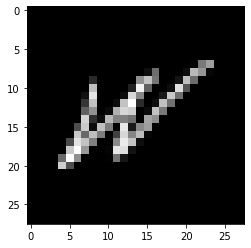

In [178]:
plt.imshow(X_train[101].reshape(28,28), cmap='gray')

In [179]:
import cv2
from tqdm import tqdm

In [180]:
DATADIR=r"C:\Users\Bhargav Nath\Pictures\ALPHABET" ## my img is store in this path of my pc
CATEGORIES=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26"] 
## I created the 10 categories by saving each img to 10 different folder

## created a list where  img array and the class no. is present
target_data=[]

def create_target_data():
    for category in CATEGORIES:
        class_num=CATEGORIES.index(category)
        path = os.path.join(DATADIR, category)
        for img in tqdm(os.listdir(path)):
            
           
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                target_data.append([img_array,class_num])
            
create_target_data()

100%|██████████| 1/1 [00:00<00:00, 125.03it/s]


In [181]:
X = [] ## we extract imges from target data and store in X
Y = [] ## we extract label from target data and store in Y

for features,label in target_data:
    X.append(features)
    Y.append(label)

In [182]:
X = np.array(X).reshape(-1,28,28,1)
print(Y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


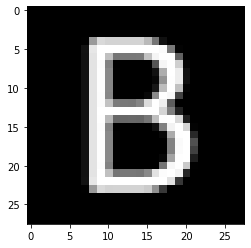

In [183]:
plt.imshow(X[1].reshape(28,28), cmap='gray') ## plot our own data

In [184]:
## create a dataset where instead of labels, replace each corresponding value 
## by our own created images which is shown bellow 
n_dataset=[]       
                   
def create_new_dataset():
    for i, a in enumerate(Y_train):
         if a==Y[a]:
                new_lab=X[a]
                n_dataset.append(new_lab)
                
                
create_new_dataset()    

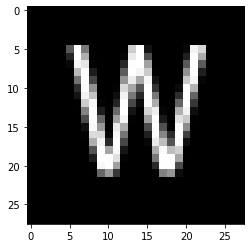

In [185]:
n_dataset = np.array(n_dataset).reshape(-1,28,28,1)
plt.imshow(n_dataset[101].reshape(28,28), cmap= 'gray')

In [186]:
n_test_dataset=[]  ## simillarly creating reference dataset for testing

def create_new_test_dataset():
    for i, a in enumerate(Y_test):
         if a==Y[a]:
                new_lab=X[a]
                n_test_dataset.append(new_lab)
                
                
create_new_test_dataset()

In [187]:
n_test_dataset = np.array(n_test_dataset).reshape(-1,28,28,1)
print(n_test_dataset.shape)

(74490, 28, 28, 1)


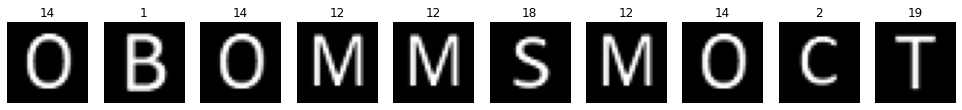

In [188]:
w =1
l =10
fig, axes = plt.subplots(w,l, figsize=(17,3))
axes = axes.ravel()
n_training= len(Y_train)
for i in np.arange(0, w*l):
    #index= np.random.randint(0,n_training)
    axes[i].imshow(n_dataset[i].reshape(28,28), cmap= 'gray')
    axes[i].set_title(Y_train[i])
    axes[i].axis('off')

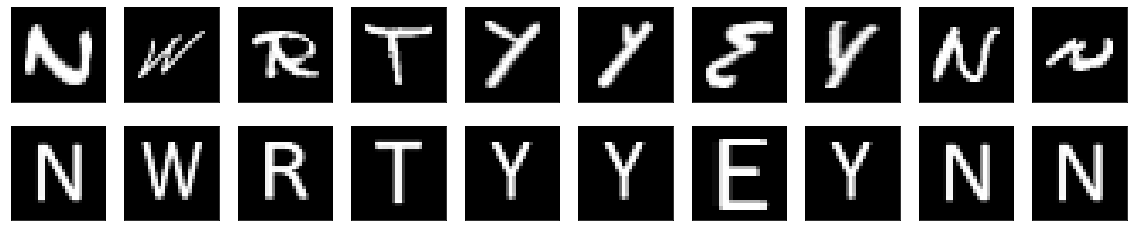

In [189]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_train[100:1100], n_dataset[100:1100]], axes):
    for img, ax in zip(images, row):
        ax.imshow( img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [190]:
X_train = X_train/255
X_test = X_test/255
n_dataset=n_dataset/255
n_test_dataset = n_test_dataset/255

In [191]:
from keras.layers import Input, Dense
from keras.models import Model

input_size = 784  ## converting 28 by 28 pixel values to one dimensional 784 pixel 
hidden_size = 150
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
output_img = Dense(input_size, activation='sigmoid')(hidden_1)

In [192]:
mynetwork = Model(input_img, output_img)
mynetwork.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

In [193]:
history= mynetwork.fit(X_train.reshape(-1,784),n_dataset.reshape(-1,784),epochs=1,shuffle=True,
                       validation_data =(X_test.reshape(-1,784), n_test_dataset.reshape(-1, 784)))

Train on 297960 samples, validate on 74490 samples
Epoch 1/1
297960/297960 [==============================] - 164s 552us/step - loss: 0.2249 - accuracy: 0.8021 - val_loss: 0.2199 - val_accuracy: 0.8022


In [195]:
## making prediction by giving test images
predicted=mynetwork.predict(X_test[0:1100].reshape(-1,784))

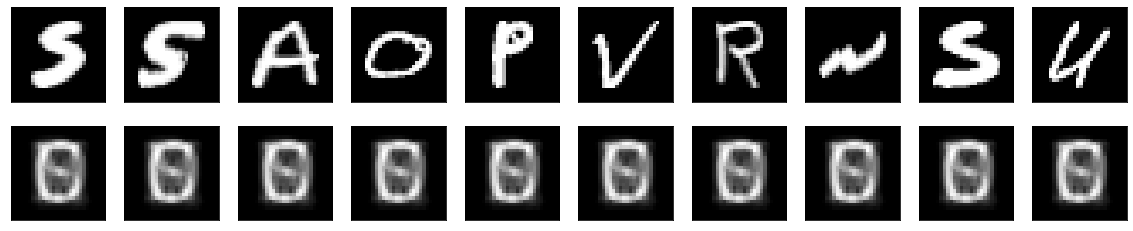

In [196]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[0:1100], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow( img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [174]:
predicted=autoencoder.predict(X_test[1000:1100])

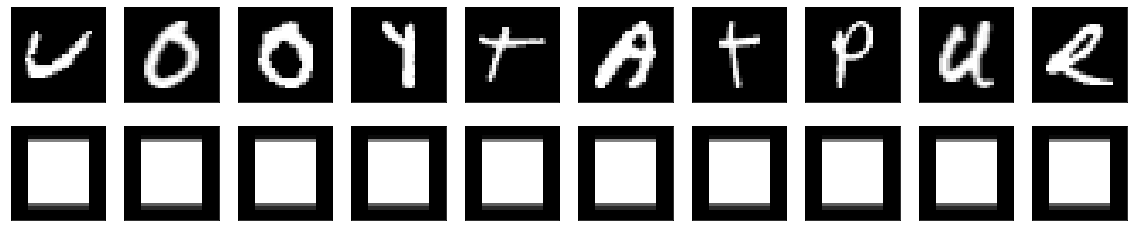

In [175]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[1000:1100], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

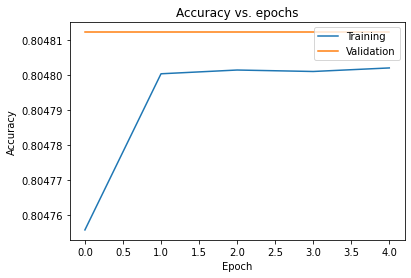

In [103]:
## ploting of accuracy and epoch 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

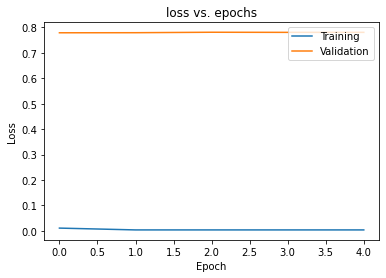

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 